In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import time
import datetime

In [140]:
test_set_values = pd.read_csv("/Users/azeemmuzammil/Documents/Aca/pump-it-up/data_set/test_set_values.csv")
training_set_labels = pd.read_csv("/Users/azeemmuzammil/Documents/Aca/pump-it-up/data_set/training_set_labels.csv")
training_set_values = pd.read_csv("/Users/azeemmuzammil/Documents/Aca/pump-it-up/data_set/training_set_values.csv")

In [141]:
data_set = pd.merge(training_set_values , training_set_labels , on ="id")

In [142]:
data_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [143]:
data_set = data_set.drop(['id'], axis=1)

In [144]:
data_set['longitude'] = data_set['longitude'].replace(0, data_set['longitude'].mean())

In [145]:
data_set['permit'] = data_set['permit'].astype(str)
data_set['public_meeting'] = data_set['public_meeting'].astype(str)

In [146]:
category_columns = ['funder',
       'installer', 'wpt_name', 
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting',
       'scheme_management', 
       'scheme_name', 
       'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group',
       'status_group']

In [147]:
for column in category_columns:
    if column not in data_set.columns:
        continue
        
    data_set[column] = data_set[column].fillna('n/a')

In [148]:
encoders = {} 
for column in category_columns:
    if column not in data_set.columns:
        continue
            
    label_encoder = LabelEncoder()
    label_encoder.fit(data_set[column])

    data_set[column] = label_encoder.transform(data_set[column])
    encoders[column]= label_encoder

In [149]:
timestamp_format="%Y-%m-%d"
data_set['date_recorded'] = [ datetime.datetime.strptime(x, timestamp_format).timestamp() for x in data_set['date_recorded']]

In [150]:
data_set.drop('recorded_by', axis=1, inplace=True)

In [151]:
drop_columns = ['region',
                'extraction_type_group', 'extraction_type_class', 
                'management_group', 
                'payment', 
                'quality_group', 
                'quantity', 
                'source_type', 'source_class', 
                'waterpoint_type_group']
data_set.drop(drop_columns,1, inplace=True)

/var/folders/n6/96n03bt14yg77scyc2n2fqq40000gn/T/ipykernel_14741/839541878.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_set.drop(drop_columns,1, inplace=True)


In [152]:
def scale_columns(dataset: pd.DataFrame):
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)

scale_columns(data_set)

In [153]:
def prepare_data_set(data_set):
    id_column = data_set['id']
    
    data_set = data_set.drop(['id'], axis=1)
    data_set['longitude'] = data_set['longitude'].replace(0, data_set['longitude'].mean())

    data_set['permit'] = data_set['permit'].astype(str)
    data_set['public_meeting'] = data_set['public_meeting'].astype(str)

    for column in category_columns:
        if column not in data_set.columns:
            continue
        
        data_set[column] = data_set[column].fillna('n/a')

    encoders = {} 
    for column in category_columns:
        if column not in data_set.columns:
            continue
            
        label_encoder = LabelEncoder()
        label_encoder.fit(data_set[column])

        data_set[column] = label_encoder.transform(data_set[column])
        encoders[column]= data_set
    
    data_set['date_recorded'] = [ datetime.datetime.strptime(x, timestamp_format).timestamp() for x in data_set['date_recorded']]

    data_set.drop('recorded_by', axis=1, inplace=True)
    data_set.drop(drop_columns,1, inplace=True)

    data_set = std_scaler.fit_transform(data_set)
    
    return data_set, id_column

In [154]:
def split_dataset(dataset: pd.DataFrame): 
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    return train_test_split(X, y, test_size=0.1, random_state = 0)

X_train, X_test, y_train, y_test = split_dataset(data_set)

In [155]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

In [156]:
def random_forest(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=25, n_estimators = 42*5, criterion = 'entropy', random_state = 0)

    clf.fit(X_train, y_train)
    
    return clf

Random Forest has accuracy: 0.8183501683501684


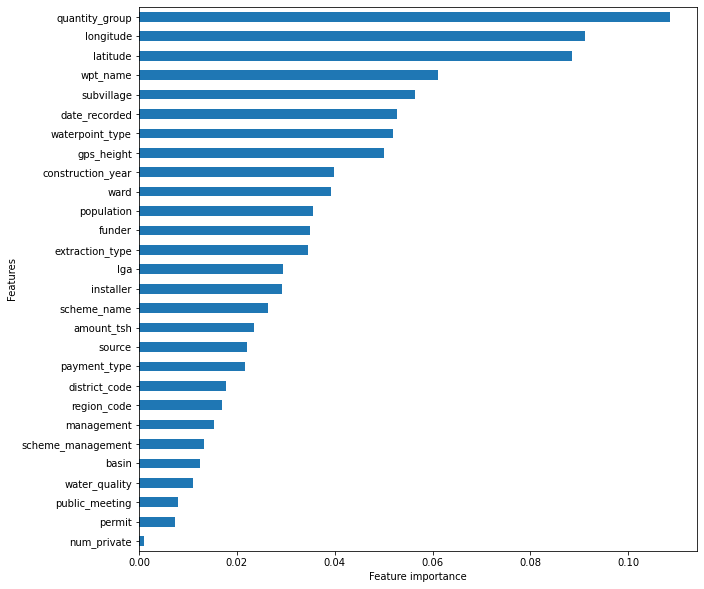

In [166]:
rf_clf = random_forest(X_train, y_train)

accuracy = rf_clf.score(X_test, y_test)
print(f'Random Forest has accuracy: {accuracy}')
plot_features_importances(rf_clf, X_train)

In [158]:
def k_nearest(X_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=3)
    
    clf.fit(X_train, y_train)
    
    return clf

In [168]:
k_nearest_clf = k_nearest(X_train, y_train)

k_acc = k_nearest_clf.score(X_test, y_test)
print(f'K-Nearest Neighbors has accuracy: {k_acc}')

K-Nearest Neighbors has accuracy: 0.5934343434343434


In [160]:
real_X, real_id_column = prepare_data_set(test_set_values)

/var/folders/n6/96n03bt14yg77scyc2n2fqq40000gn/T/ipykernel_14741/2886468581.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_set.drop(drop_columns,1, inplace=True)


In [161]:
real_y = rf_clf.predict(real_X)

In [162]:
status_group_encoder = encoders['status_group']

<class 'dict'>


In [163]:
real_decoded_y = pd.DataFrame(status_group_encoder.inverse_transform(real_y), columns = ['status_group'])

In [164]:
result = pd.concat([real_id_column, real_decoded_y], axis=1)

In [165]:
result.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,non functional
